In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn
from pyneb import config, log_, atomicData
from pyneb.utils.misc import parseAtom
pn.config.use_multiprocs()
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table
import pandas as pd
from pathlib import Path

In [2]:
data_dir = Path('/Users/christophemorisset/DATA/MUSE_Jorge/hektor_fits/ngc6778_maps/ngc6778_long_maps')

In [3]:
l_dic = {'4641.0': ('N', 2, '4641A', 1),
         '4651.0' : ('O', 2, '4649A', 1),
         '4659.0' : ('Fe', 3, '4659A', 0),
         '4662.0' : ('O', 2, '4662A', 1),
         '4686.0' : ('He', 2, '4686A', 1),
         '4711.0' : ('Ar', 4, '4711A', 0),
         '4713.0' : ('He', 1, '4713A', 1),
         '4741.0' : ('Ar', 4, '4740A', 0),
         '4861.0' : ('H', 1, '4861A', 1),
         '4959.0' : ('O', 3, '4959A', 0),
         '5200.0' : ('N', 1, '5200A', 0),
         '5343.0' : ('C', 2, '5342A', 1),
         '5519.0' : ('Cl', 3, '5518A', 0),
         '5539.0' : ('Cl', 3, '5538A', 0),
         '5677' : ('N', 2, '5676A', 1),
         '5681.0' : ('N', 2, '5679A', 1),
         '5755.0' : ('N', 2, '5755A', 0),
         '5877' : ('He', 1, '5876A', 1),
         '6301.0' : ('O', 1, '6300A', 0),
         '6313' : ('S', 3, '6312A', 0),
         '6365.0' : ('O', 1, '6364A', 0),
         '6463.0' : ('C', 2, '6461A', 0),
         '6549.0' : ('N', 2, '6548A', 0),
         '6564.0' : ('H', 1, '6563A', 1),
         '6585.0' : ('N', 2, '6584A', 0),
         '6679.0' : ('He', 1, '6678A', 1),
         '6719.0' : ('S', 2, '6716A', 0),
         '6733.0' : ('S', 2, '6731A', 0),
         '7002' : ('O', 4, '7004A', 0),
         '7006.0' : ('Ne', 5, '7005A', 0),
         '7067.0' : ('He', 1, '7065A', 1),
         '7137.0' : ('Ar', 3, '7136A', 0),
         '7321.0' : ('O', 2, '7320A', 0),
         '7332.0' : ('O', 2, '7330A', 0),
         '7532.0' : ('Cl', 4, '7531A', 0),
         '7753.0' : ('Ar', 3, '7751A', 0),
         '7772.0' : ('O', 1, '7771A', 1),
         '7774.0' : ('O', 1, '7773A', 1),
         '7777' : ('O', 1, '7775A', 1),
         '8048.0' : ('Cl', 4, '8046A', 0),
         '8730.0' : ('C', 1, '8728A', 0),
         '8736.0' : ('He', 1, '8733A', 1),
         '8753.0' : ('H', 1, '8750A', 1), 
         '9071.0' : ('S', 3, '9069A', 0)
         }

In [4]:
obs = pn.Observation(corrected = False)
for lam_str in l_dic:
    l = l_dic[lam_str]
    data_file = data_dir / Path('ngc6778_MUSE_{}.fits'.format(lam_str))
    fits_hdu = fits.open(data_file)[0]
    fits_data = fits_hdu.data
    err_data_file = data_dir / Path('ngc6778_MUSE_{}_error.fits'.format(lam_str))
    err_fits_hdu = fits.open(err_data_file)[0]
    err_fits_data = err_fits_hdu.data
    if l[3] == 1:
        perm = 'r'
    else:
        perm = ''
    label='{}{}{}_{}'.format(l[0], l[1], perm, l[2])
    line = pn.EmissionLine( label=label,
                           obsIntens=fits_data.ravel(), 
                           obsError=err_fits_data.ravel(), 
                           corrected=False, errIsRelative=False)
    obs.addLine(line)
wcs = WCS(fits_hdu.header).celestial
obs.names = ['N{}N'.format(i) for i in range(obs.n_obs)]

warng EmissionLine: Atom N2r not valid
warng EmissionLine: line 4649A for atom O2r not valid
warng EmissionLine: line 4662A for atom O2r not valid
warng EmissionLine: Atom C2r not valid
warng EmissionLine: Atom N2r not valid
warng EmissionLine: Atom N2r not valid
warng EmissionLine: line 6461A for atom C2 not valid
warng EmissionLine: line 7004A for atom O4 not valid
warng EmissionLine: line 7005A for atom Ne5 not valid
warng EmissionLine: Atom O1r not valid
warng EmissionLine: Atom O1r not valid
warng EmissionLine: Atom O1r not valid
warng EmissionLine: line 8733A for atom He1r not valid
warng EmissionLine: line 8750A for atom H1r not valid


In [5]:
pn.log_.level=3
pn.log_.timer('Starting', quiet=True)
obs.addMonteCarloObs(50)
pn.log_.timer('Ending MC')

     addMonteCarloObs: Entering
     addMonteCarloObs: Leaving
   None: Ending MC in 2.533754825592041


In [6]:
obs.def_EBV()

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/extinction/red_corr.py:299: RuntimeWarning: invalid value encountered in log10
  self.E_BV = 2.5 * np.log10(obs_over_theo) / (f1 - f2)


/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


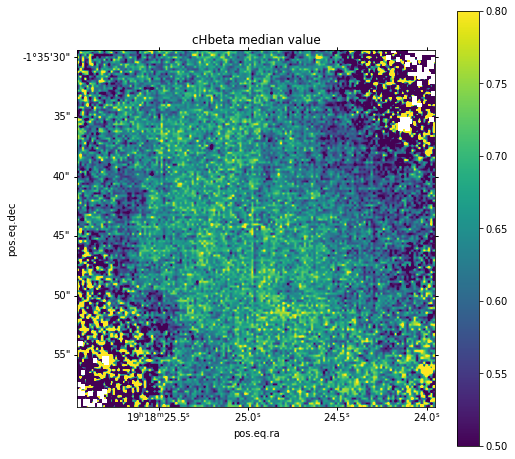

In [22]:
c_Hbeta = obs.extinction.cHbeta.reshape((150, 150, 51))
f, ax = plt.subplots(subplot_kw={'projection': wcs}, figsize=(8,8))
im = ax.imshow(np.nanmedian(c_Hbeta, 2), vmin=0.5, vmax=.8)
cb = f.colorbar(im, ax=ax)
ax.set_title('cHbeta median value');

In [33]:
np.nanmedian(c_Hbeta, 2).shape

(150, 150)

0.6304281695949235


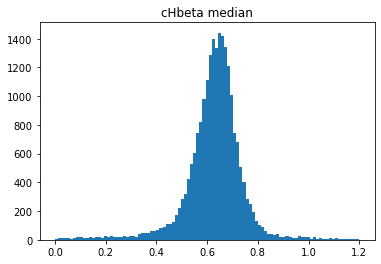

In [40]:
f, ax = plt.subplots()
ax.hist(np.nanmedian(c_Hbeta, 2).ravel(), bins=np.linspace(0, 1.2, 100))
ax.set_title('cHbeta median')
print(np.nanmedian(c_Hbeta));

In [41]:
obs.extinction.cHbeta = 0.63
obs.correctData()

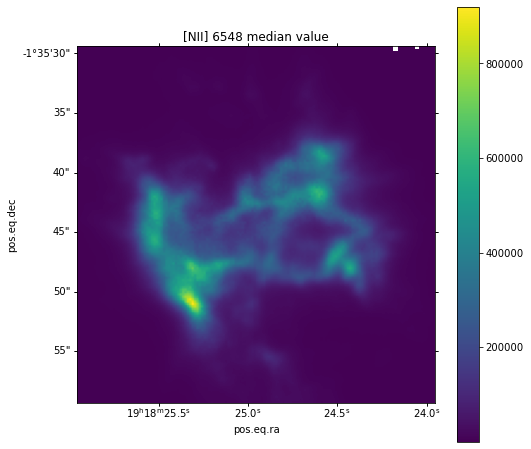

In [42]:
f, ax = plt.subplots(subplot_kw={'projection': wcs}, figsize=(8,8))
im=ax.imshow(np.nanmedian(obs.getIntens()['N2_6548A'].reshape(150,150,51), 2))
cb = f.colorbar(im, ax=ax)
ax.set_title('[NII] 6548 median value');

In [10]:
obs.n_obs

1147500

In [43]:
pn.log_.level=2
diags = pn.Diagnostics()
diags.ANN_inst_kwargs['verbose']=True
diags.addDiagsFromObs(obs)

warng Observation: No line for O2_3727A+ from NoneNone at wavelength None (blend=False)


In [44]:
diags.diags

{'[NII] 5755/6548': ('N2', 'L(5755)/L(6548)', 'RMS([E(6548), E(5755)])'),
 '[NII] 5755/6584': ('N2', 'L(5755)/L(6584)', 'RMS([E(6584), E(5755)])'),
 '[NII] 5755/6584+': ('N2',
  'L(5755)/(L(6548)+L(6584))',
  'RMS([E(6548)*L(6548)/(L(6548)+L(6584)), E(6584)*L(6584)/(L(6584)+L(6548)), E(5755)])'),
 '[SII] 6731/6716': ('S2', 'L(6731)/L(6716)', 'RMS([E(6716), E(6731)])'),
 '[SIII] 6312/9069': ('S3', 'L(6312)/L(9069)', 'RMS([E(9069), E(6312)])'),
 '[ClIII] 5538/5518': ('Cl3', 'L(5538)/L(5518)', 'RMS([E(5518), E(5538)])'),
 '[ArIV] 4740/4711': ('Ar4', 'L(4740)/L(4711)', 'RMS([E(4711), E(4740)])')}

In [45]:
pn.log_.timer('Starting', quiet=True)
pn.log_.level = 3
Te_N2, Ne_S2 = diags.getCrossTemDen('[NII] 5755/6584', '[SII] 6731/6716', obs=obs, use_ANN=True)
print('-----------')
Te_S3, Ne_Cl3 = diags.getCrossTemDen('[SIII] 6312/9069', '[ClIII] 5538/5518', obs=obs, use_ANN=True)
pn.log_.timer('ANN getCrossTemDen done')

Instantiation. V 0.17
Training set size = 900, Test set size = 0
Train data scaled. Log10 applied. 
Test data scaled. 
Training set size = 900, Test set size = 0
Training set size = 900, Test set size = 0
Regression Model SK_ANN
Training 2 inputs for 2 outputs with 900 data
(900, 2) (900, 2)
RM trained, with 13563 iterations. Score = 0.999
MLPRegressor(activation='tanh', hidden_layer_sizes=(10, 30, 10), max_iter=20000,
             solver='lbfgs')
Training time 17.1 s.
Test data scaled. Log10 applied. 
Training set size = 900, Test set size = 1050722


/Users/christophemorisset/Google Drive/Pro/AI4neb/ai4neb/Regressor/RegressionModel.py:541: RuntimeWarning: invalid value encountered in log10
  X = np.log10(X)


Predicting from 2 inputs to 2 outputs using 1050722 data in 0.82 secs.
-----------
Instantiation. V 0.17
Training set size = 900, Test set size = 0
Train data scaled. Log10 applied. 
Test data scaled. 
Training set size = 900, Test set size = 0
Training set size = 900, Test set size = 0
Regression Model SK_ANN
Training 2 inputs for 2 outputs with 900 data
(900, 2) (900, 2)
RM trained, with 2152 iterations. Score = 1.000
MLPRegressor(activation='tanh', hidden_layer_sizes=(10, 30, 10), max_iter=20000,
             solver='lbfgs')
Training time 2.6 s.
Test data scaled. Log10 applied. 
Training set size = 900, Test set size = 862348


/Users/christophemorisset/Google Drive/Pro/AI4neb/ai4neb/Regressor/RegressionModel.py:541: RuntimeWarning: invalid value encountered in log10
  X = np.log10(X)


Predicting from 2 inputs to 2 outputs using 862348 data in 0.66 secs.
   None: ANN getCrossTemDen done in 21.561945915222168


In [46]:
Te_N2 = np.reshape(Te_N2, (150, 150, 51))
Ne_S2 = np.reshape(Ne_S2, (150, 150, 51))
Te_S3 = np.reshape(Te_S3, (150, 150, 51))
Ne_Cl3 = np.reshape(Ne_Cl3, (150, 150, 51))

/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/Users/christophemorisset/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


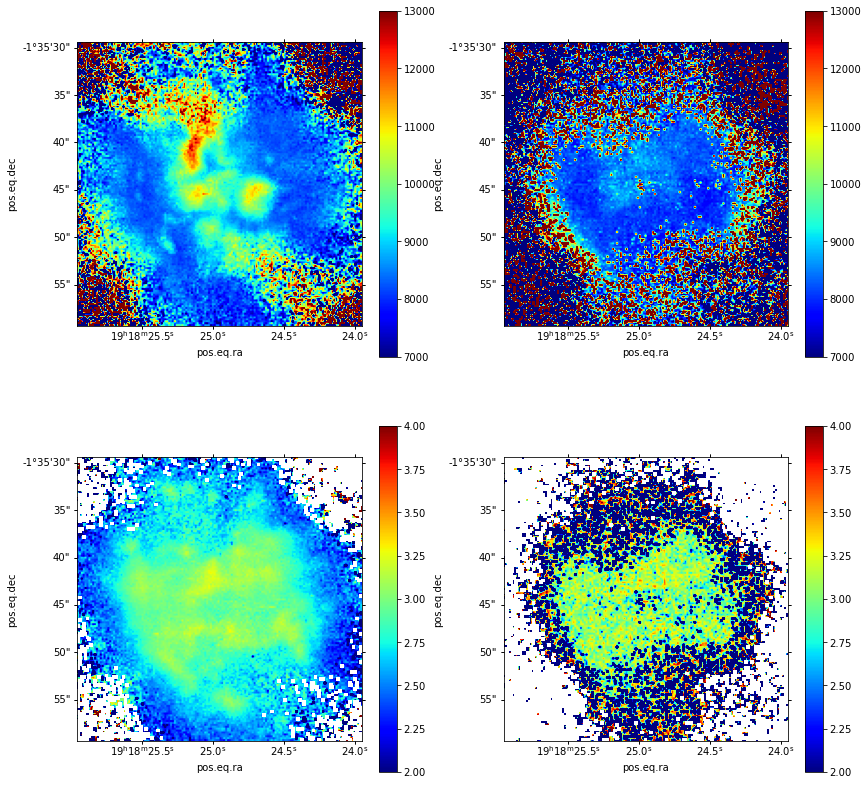

In [47]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, subplot_kw={'projection': wcs}, figsize=(14,14))
im1 = ax1.imshow(np.median(Te_N2, 2), vmin=7000, vmax=13000, cmap='jet')
cb1 = f.colorbar(im1, ax=ax1)
im2 = ax2.imshow(np.median(Te_S3, 2), vmin=7000, vmax=13000, cmap='jet')
cb2 = f.colorbar(im2, ax=ax2)
im3 = ax3.imshow(np.log10(np.median(Ne_S2, 2)), vmin=2, vmax=4, cmap='jet')
cb3 = f.colorbar(im3, ax=ax3)
im4 = ax4.imshow(np.log10(np.median(Ne_Cl3, 2)), vmin=2, vmax=4, cmap='jet')
cb4 = f.colorbar(im4, ax=ax4)

In [48]:
mask = np.nanstd(Te_N2, 2) > (np.nanmedian(Te_N2, 2) / 5)

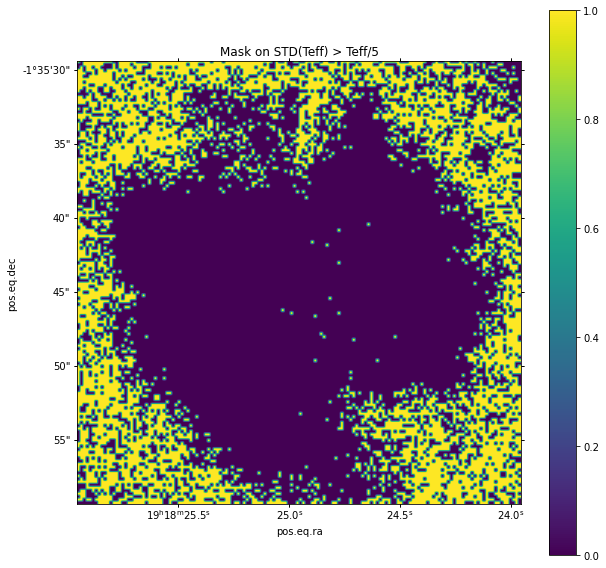

In [49]:
f, ax = plt.subplots(subplot_kw={'projection': wcs}, figsize=(8,8))
im=ax.imshow(mask, vmin=0,vmax=1)
ax.set_title('Mask on STD(Teff) > Teff/5')
cb = f.colorbar(im, ax=ax)
f.tight_layout();